In [120]:
import torch
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy
from model_GAN import *

ngpu = 1
nz = 100 # size of latent variable
batchSize = 9
ngf = 64
nc = 3

In [123]:
netG = Generator(ngpu, nz, ngf, nc)
device = "cuda:0"
netG = netG.to(device)
netG.eval()
netG.load_state_dict(torch.load("../CI_IVLSGAN_CIFAR/trained_model/netG_epoch_400.pth"))

RuntimeError: Error(s) in loading state_dict for Generator:
	Missing key(s) in state_dict: "main.0.weight", "main.0.bias", "main.1.weight", "main.2.weight", "main.2.bias", "main.2.running_mean", "main.2.running_var", "main.4.weight", "main.5.weight", "main.5.bias", "main.5.running_mean", "main.5.running_var", "main.7.weight", "main.8.weight", "main.8.bias", "main.8.running_mean", "main.8.running_var", "main.10.weight", "main.11.weight", "main.11.bias", "main.11.running_mean", "main.11.running_var", "main.13.weight". 
	Unexpected key(s) in state_dict: "l1.0.weight", "l1.0.bias", "conv_blocks.0.weight", "conv_blocks.1.weight", "conv_blocks.1.bias", "conv_blocks.1.running_mean", "conv_blocks.1.running_var", "conv_blocks.1.num_batches_tracked", "conv_blocks.3.weight", "conv_blocks.4.weight", "conv_blocks.4.bias", "conv_blocks.4.running_mean", "conv_blocks.4.running_var", "conv_blocks.4.num_batches_tracked", "conv_blocks.6.weight". 

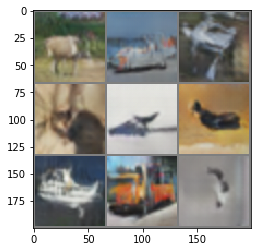

In [118]:
noise = torch.randn(batchSize, nz, 1, 1, device=device)
fake = netG(noise)
image = (vutils.make_grid(fake.cpu().detach(), nrow=3).numpy() * 0.5 + 0.5)
# print(image)
plt.imshow(numpy.transpose(image, (1, 2, 0)))
plt.show()

In [119]:
vutils.save_image(fake.cpu().detach(), './CIFAR.png', normalize=True)